In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/raghav/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [45]:
df = pd.read_csv('Datasets/BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,NaN,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [63]:
df.describe()

,Occupation,Baseball Caps,Wine Tumblers,Pet Raincoats,Purchase
count,537577.00000,537577.000000,370591.000000,164278.000000,537577.000000
mean,8.08271,5.295546,9.842144,12.669840,9333.859853
std,6.52412,3.750701,5.087259,4.124341,4981.022133
min,0.00000,1.000000,2.000000,3.000000,185.000000
25%,2.00000,1.000000,5.000000,9.000000,5866.000000
50%,7.00000,5.000000,9.000000,14.000000,8062.000000
75%,14.00000,8.000000,15.000000,16.000000,12073.000000
max,20.00000,18.000000,18.000000,18.000000,23961.000000


In [47]:
columnsDrop = ['User_ID','Product_ID','Stay_In_Current_City_Years']
df.drop(columnsDrop,inplace=True,axis=1)
df.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,0,3,NaN,NaN,8370
1,F,0-17,10,A,0,1,6.0,14.0,15200
2,F,0-17,10,A,0,12,NaN,NaN,1422
3,F,0-17,10,NaN,0,12,14.0,NaN,1057
4,M,55+,16,C,0,8,NaN,NaN,7969


In [48]:
df.City_Category.unique()
df.City_Category.isnull().sum()

125

In [49]:
df.City_Category.fillna('B',inplace=True)
df.City_Category.isnull().sum()

0

In [50]:
df.City_Category.unique()

array(['A', 'B', 'C'], dtype=object)

In [51]:
df['City_Category'] = df['City_Category'].map({"A":"Metro Cities","B": "Small Towns","C":"Villages"})
df.head(10)

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,Metro Cities,0,3,NaN,NaN,8370
1,F,0-17,10,Metro Cities,0,1,6.0,14.0,15200
2,F,0-17,10,Metro Cities,0,12,NaN,NaN,1422
3,F,0-17,10,Small Towns,0,12,14.0,NaN,1057
4,M,55+,16,Villages,0,8,NaN,NaN,7969
5,M,26-35,15,Metro Cities,0,1,2.0,NaN,15227
6,M,46-50,7,Small Towns,1,1,8.0,17.0,19215
7,M,46-50,7,Small Towns,1,1,15.0,NaN,15854
8,M,46-50,7,Small Towns,1,1,16.0,NaN,15686
9,M,26-35,20,Metro Cities,1,8,NaN,NaN,7871


In [52]:
df.rename(columns={"Product_Category_1": "Baseball Caps","Product_Category_2":"Wine Tumblers","Product_Category_3":"Pet Raincoats"},inplace=True)

In [53]:
df.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Baseball Caps,Wine Tumblers,Pet Raincoats,Purchase
0,F,0-17,10,Metro Cities,0,3,NaN,NaN,8370
1,F,0-17,10,Metro Cities,0,1,6.0,14.0,15200
2,F,0-17,10,Metro Cities,0,12,NaN,NaN,1422
3,F,0-17,10,Small Towns,0,12,14.0,NaN,1057
4,M,55+,16,Villages,0,8,NaN,NaN,7969


In [54]:
df['Marital_Status'] = df['Marital_Status'].map({0:"Un-Married",1:'Married'})
df.head(10)

,Gender,Age,Occupation,City_Category,Marital_Status,Baseball Caps,Wine Tumblers,Pet Raincoats,Purchase
0,F,0-17,10,Metro Cities,Un-Married,3,NaN,NaN,8370
1,F,0-17,10,Metro Cities,Un-Married,1,6.0,14.0,15200
2,F,0-17,10,Metro Cities,Un-Married,12,NaN,NaN,1422
3,F,0-17,10,Small Towns,Un-Married,12,14.0,NaN,1057
4,M,55+,16,Villages,Un-Married,8,NaN,NaN,7969
5,M,26-35,15,Metro Cities,Un-Married,1,2.0,NaN,15227
6,M,46-50,7,Small Towns,Married,1,8.0,17.0,19215
7,M,46-50,7,Small Towns,Married,1,15.0,NaN,15854
8,M,46-50,7,Small Towns,Married,1,16.0,NaN,15686
9,M,26-35,20,Metro Cities,Married,8,NaN,NaN,7871


[]

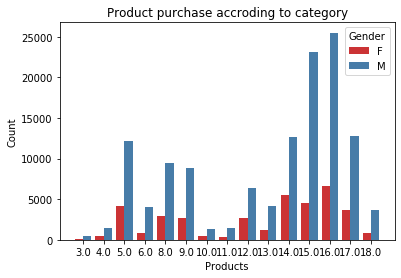

In [65]:
ax = sns.countplot(x='Pet Raincoats',hue='Gender',palette='Set1',data=df)
ax.set(title='Product purchase accroding to category',xlabel='Products',ylabel='Count')
plt.plot()

[]

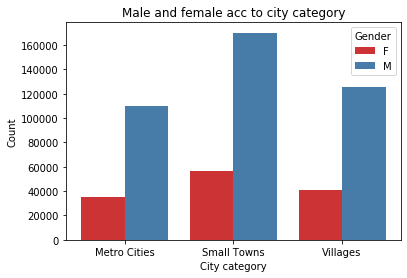

In [68]:
ax = sns.countplot(x='City_Category',hue='Gender',data=df,palette='Set1')
ax.set(title='Male and female acc to city category',xlabel='City category',ylabel='Count')
plt.plot()

[]

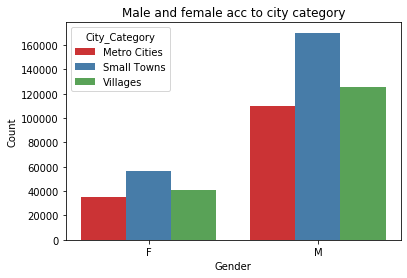

In [70]:
ax = sns.countplot(x='Gender',hue='City_Category',data=df,palette='Set1')
ax.set(title='Male and female acc to city category',xlabel='Gender',ylabel='Count')
plt.plot()